## Auto Regression Integrated Moving Average (ARIMA)

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading Dataset

In [3]:
df = pd.read_csv('datasets/shampoo.csv', header=0, parse_dates=[0])

In [4]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [5]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [23]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [6]:
df.shape

(36, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


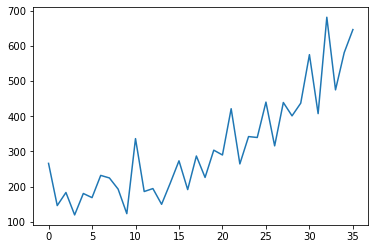

In [10]:
df['Sales'].plot();

#### Auto Correlation Plot

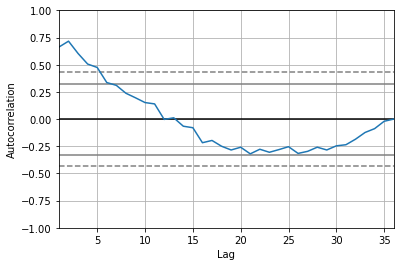

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales']);

#### Partial Auto Correlation Graph

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf

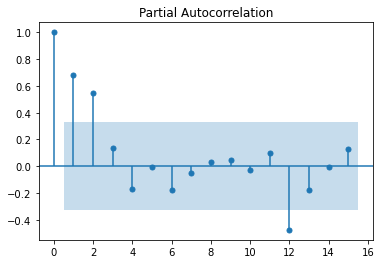

In [14]:
plot_pacf(df['Sales'], lags=15);

#### ARIMA Model

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model = ARIMA(df['Sales'], order=(5,2,2))

In [26]:
model_fit = model.fit()

D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -191.901
Date:                Mon, 05 Apr 2021   AIC                            399.801
Time:                        10:47:37   BIC                            412.012
Sample:                             0   HQIC                           403.966
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2741      3.066     -0.416      0.678      -7.283       4.735
ar.L2         -0.9934      3.912     -0.254      0.800      -8.661       6.674
ar.L3         -0.8128      2.923     -0.278      0.781      -6.542       4.917
ar.L4         -0.5075      2.312     -0.220      0.826      -5.038       4.023
ar.L5         -0.0803      1.328     -0.060      0.952      -2.684       2.523
ma.L1         -0.8519      3.156     -0.270      0.787      -7.037       5.333
ma.L2          0.0832      2.548      0.033      0.974      -4.910       5.077
sigma2      3996.2471   1308.563      3.054      0.002    1431.511    6560.983
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.72   Prob(JB):                         0.81
Heteroskedasticity (H):               0.94   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
residuals = model_fit.resid

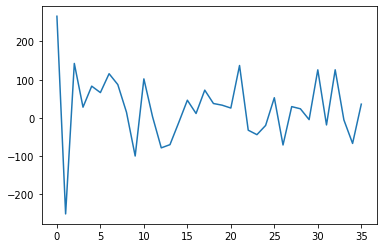

In [29]:
residuals.plot();

In [30]:
residuals.describe()

count     36.000000
mean      24.806048
std       88.931498
min     -251.238807
25%      -18.718286
50%       26.920285
75%       75.248607
max      266.000000
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [33]:
output = model_fit.forecast()

In [32]:
output

36    608.240312
dtype: float64

In [35]:
model_fit.forecast(5)

36    608.240312
37    700.069325
38    641.957561
39    725.401612
40    727.544082
Name: predicted_mean, dtype: float64

#### Walk Forward ARIMA

In [36]:
train_size = int(df.shape[0]*0.7)

In [37]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [38]:
test.shape

(11,)

In [40]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y)
    predict.append(y)
    data = np.append(data, t)
    data = pd.Series(data)

25    368.668956
dtype: float64
26    335.044741
dtype: float64
27    363.220222
dtype: float64
28    357.645323
dtype: float64
29    443.047835
dtype: float64
30    378.365673
dtype: float64
31    459.41502
dtype: float64
32    526.890876
dtype: float64
33    457.231275
dtype: float64
34    672.914943
dtype: float64
35    531.541449
dtype: float64


In [41]:
predict

[25    368.668956
 dtype: float64,
 26    335.044741
 dtype: float64,
 27    363.220222
 dtype: float64,
 28    357.645323
 dtype: float64,
 29    443.047835
 dtype: float64,
 30    378.365673
 dtype: float64,
 31    459.41502
 dtype: float64,
 32    526.890876
 dtype: float64,
 33    457.231275
 dtype: float64,
 34    672.914943
 dtype: float64,
 35    531.541449
 dtype: float64]

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

9170.052434119882